In [1]:
# 配置环境

In [1]:
import sys
import pandas as pd
Yourdir = '/Users/jacob/Documents/GitHub/'
sys.path.append(Yourdir)
from PyWPEM import WPEM

A Diffraction Refinement Software : WPEM
Bin Cao, MGI, Shanghai University, Shanghai, CHINA.
URL : https://github.com/Bin-Cao/WPEM
Executed on : 2023-05-17 20:23:57  Have a great day.




In [2]:
latt, AtomCoordinates = WPEM.CIFpreprocess(filepath='Mn2O3.cif',two_theta_range=(20, 80),)

the space group of input crystal is : I 2b 2c 3
cif file parse completed
retrieval of all reciprocal vectors satisfying the diffraction geometry is done
extinction peaks are distinguished
There are 22 extinction peaks
Diffraction condition judgment end !


In [5]:
latt, AtomCoordinates = WPEM.CIFpreprocess(filepath='RuO2.cif',two_theta_range=(20, 80))

the space group of input crystal is : P 42/m n m
cif file parse completed
retrieval of all reciprocal vectors satisfying the diffraction geometry is done
extinction peaks are distinguished
There are 0 extinction peaks
Diffraction condition judgment end !


In [6]:
AtomCoordinates

[['Ru4+', 0.0, 0.0, 0.0], ['O2-', 0.3053, 0.3053, 0.0]]

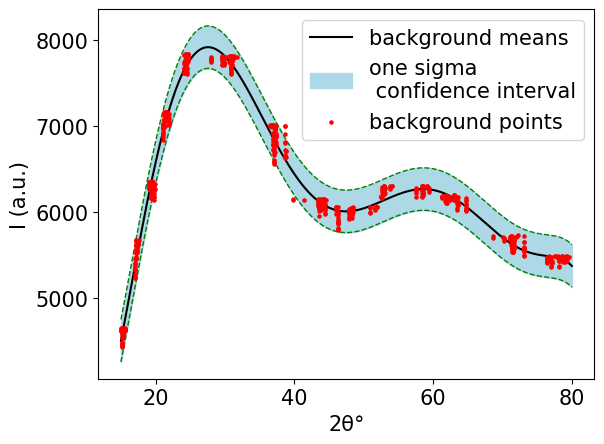

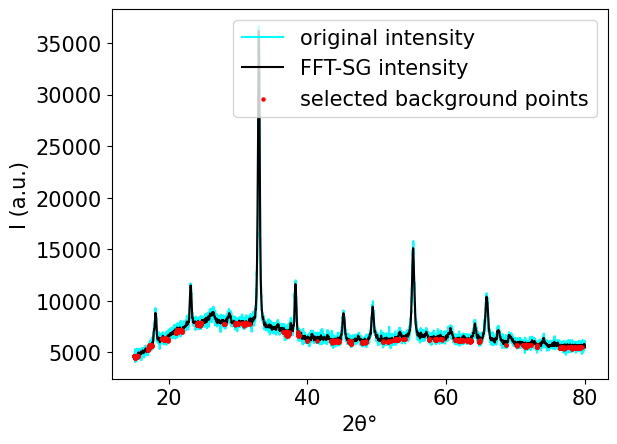

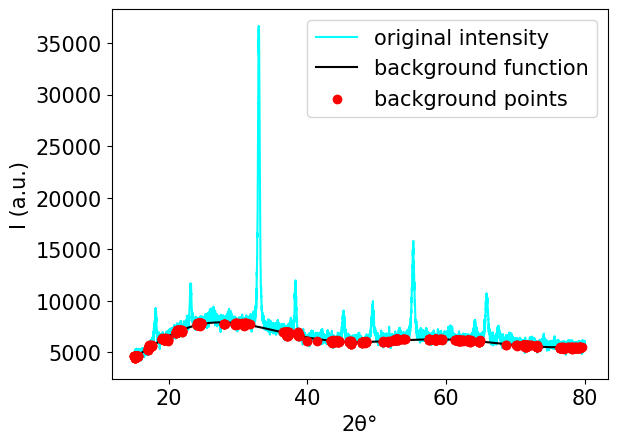

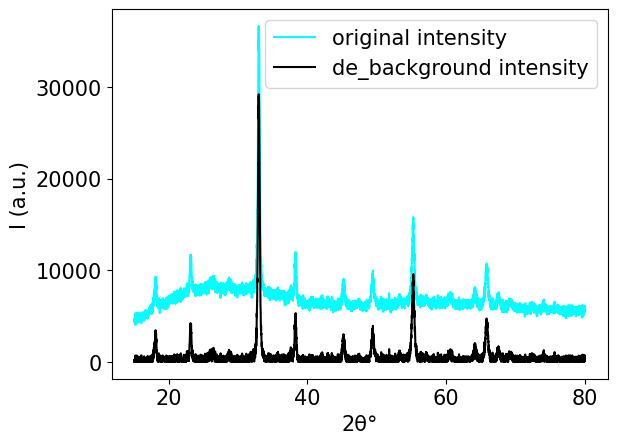

246.49744111444997

<Figure size 640x480 with 0 Axes>

In [2]:
intensity_csv = pd.read_csv(r'intensity.csv',header=None )
var = WPEM.BackgroundFit(intensity_csv,lowAngleRange=25,poly_n=8,bac_split=8,bac_num=700)
var

In [3]:
# 全谱分解

Started at Tue May 16 20:00:19 2023 

Initialization
--------------------------------------------------------------------------------
The input HKL document is matched with WPEM
Diffraction indexs have been obtained by WPEM
The input HKL document is matched with WPEM
Diffraction indexs have been obtained by WPEM


The input crystal system is: Cubic  |  The initial lattice constants : 9.411 9.411 9.411 90 90 90
The input crystal system is: Tetragonal  |  The initial lattice constants : 4.49682 4.49682 3.10491 90 90 90
Parameter initialization has been completed 

WPEM 1-th iteration
[array([ 9.41091,  9.41091,  9.41091, 90.     , 90.     , 90.     ]), array([ 4.49685,  4.49685,  3.10483, 90.     , 90.     , 90.     ])]
Rp:5.348 | Rwp:7.470 | Rsquare:10.043
WPEM 2-th iteration
[array([ 9.41066,  9.41066,  9.41066, 90.     , 90.     , 90.     ]), array([ 4.49657,  4.49657,  3.10489, 90.     , 90.     , 90.     ])]
Rp:5.046 | Rwp:7.013 | Rsquare:8.787
WPEM 3-th iteration
[array([ 9.41023, 

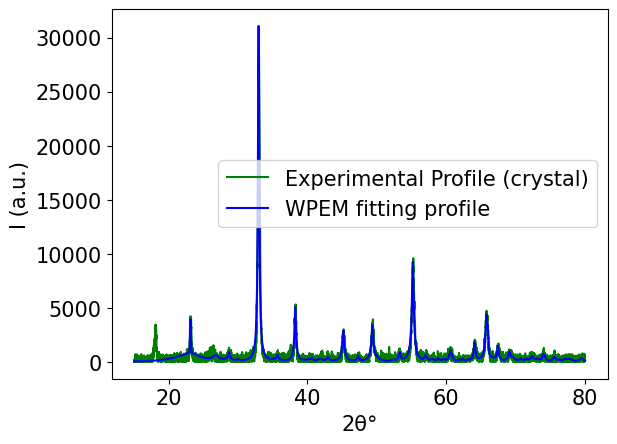

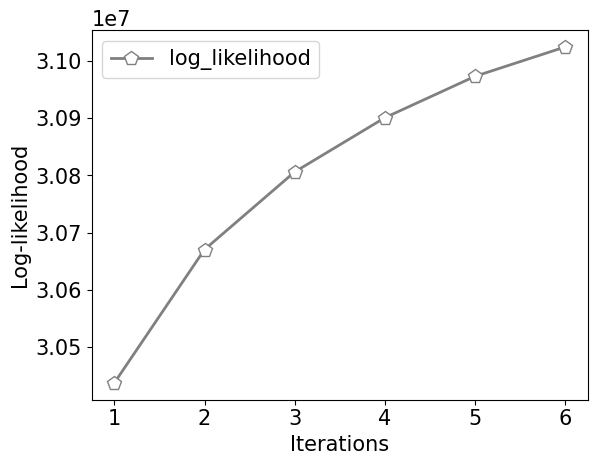

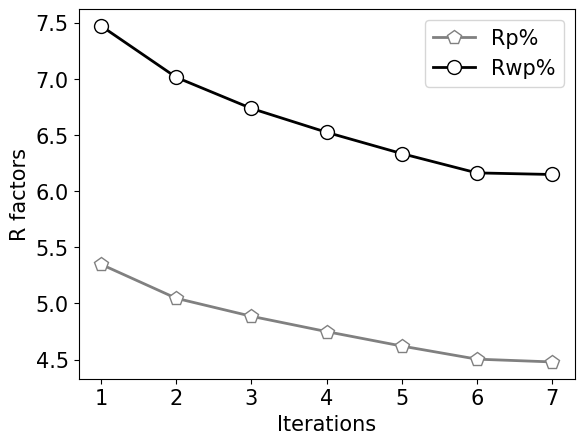

If you want to get the accurately determined of volume fraction, Please input the structure factor!
6-th iterations, reach the maximum number of iteration steps.
 Rp: 4.479
Rwp: 6.148 


WPEM program running time :  0 hours 0 minute  37 second  


'0 hours 0 minute  37 second  '

<Figure size 640x480 with 0 Axes>

In [2]:
var = 2.
# The wavelength is set according to the actual light source
wavelength = [1.540593,]

# Enter the file name to read on the right side of the equal sign. 
# Please remember to quote, string.

# The file name of non-background data (2theta-intensity data)
no_bac_intensity_file = "no_bac_intensity.csv" 
# The file name of raw/original data (2theta-intensity data)
original_file = "intensity.csv"  
# The file name of background data (2theta-intensity data)
bacground_file = "bac.csv"  


# Input the initial lattice constants {a, b, c, α, β, γ}, whose values need to be assumed at initialization.
Lattice_constants = [[9.411, 9.411, 9.411, 90, 90, 90],
                     [4.49682,4.49682,3.10491,90,90,90],]


# Execute the model
WPEM.XRDfit(
    wavelength, var, Lattice_constants,no_bac_intensity_file, original_file, bacground_file, 
    subset_number=11,low_bound=19,up_bound=60,bta = 0.85,iter_max = 5, Macromolecule = True, EXACT=True,
    num=3,asy_C = 0,cpu=6
    )


In [3]:
# 非晶拟合

Convergence get at 3 iterations!
W_list: [32129.38554921]
mu_list: [29.01200544]
sigma2_list: [27.10372215]
estimated interatomic distances : 3.785636
Rp =  17.600622223874897


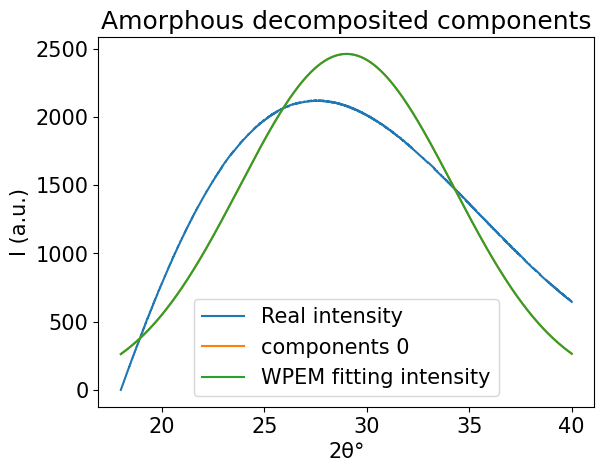

<Figure size 640x480 with 0 Axes>

In [3]:
WPEM.Amorphous_fit(mix_component = 1, ang_range=(18,40), sigma2_coef = 100, max_iter = 200)

In [8]:
# 非晶定量分析

NAa = 80.70759720998285, is evaluated at angel 76.06596038775027


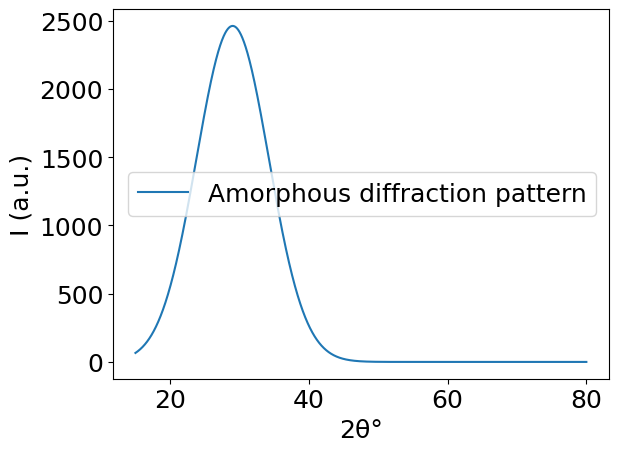

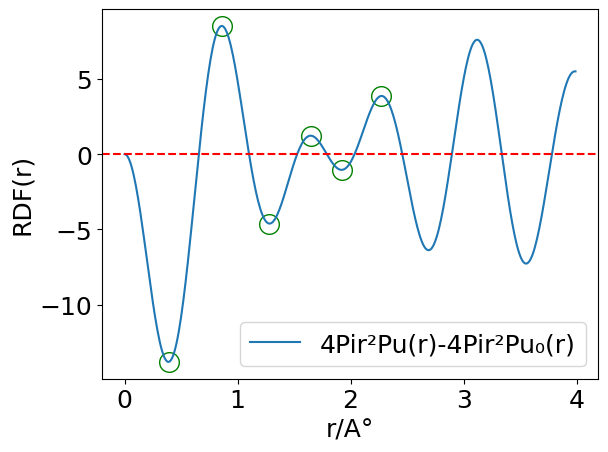

interatomic distances is 0.890000 A°


[0.39, 0.86, 1.28, 1.6500000000000001, 1.92, 2.27]

<Figure size 640x480 with 0 Axes>

In [4]:
WPEM.AmorphousRDFun(1.540593 ,r_max=4,value=0.63,highlight=6)

In [5]:
# 分解成分画图

Name assigned successfully


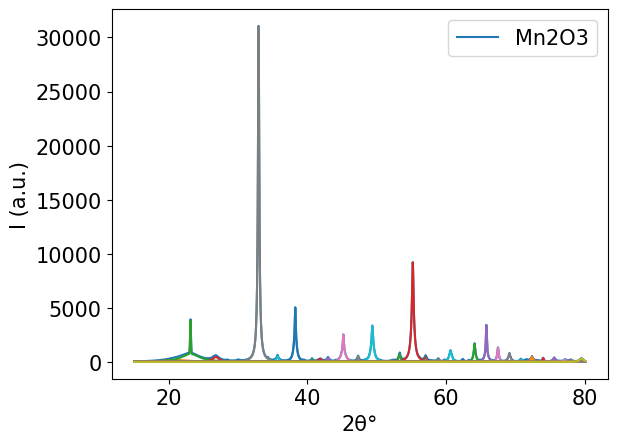

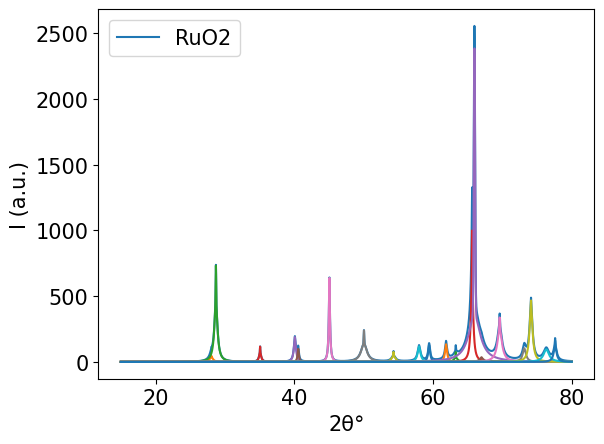

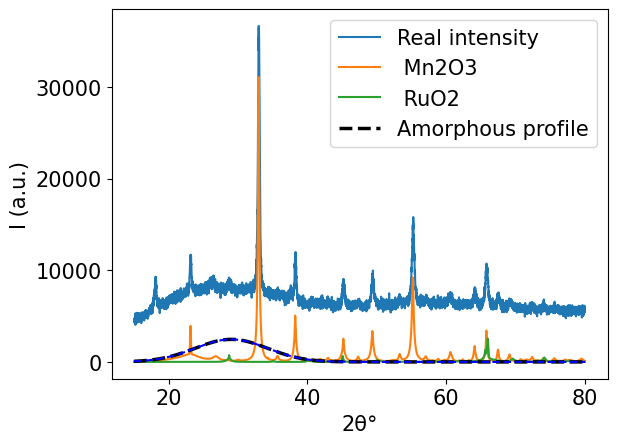

volume fraction estimate in % (calculated by integral area): [89.5245082678263, 10.475491732173703] 
 Saved at the WPEMFittingResults
Relative bulk crystallinity % (calculated by integral area): 93.42819895310123 
 Saved at the WPEMFittingResults


In [6]:
name = ['Mn2O3','RuO2','Ru2O3']
wavelength = [1.540593, 1.544414]
WPEM.Plot_Components(lowboundary=15, upboundary=80,wavelength = wavelength, name = name,Macromolecule = True,phase=2)

In [7]:
# 模拟模块

the space group of input crystal is : I 2b 2c 3
cif file parse completed
retrieval of all reciprocal vectors satisfying the diffraction geometry is done
extinction peaks are distinguished
There are 27 extinction peaks
Diffraction condition judgment end !


Initilized witout peak's shape


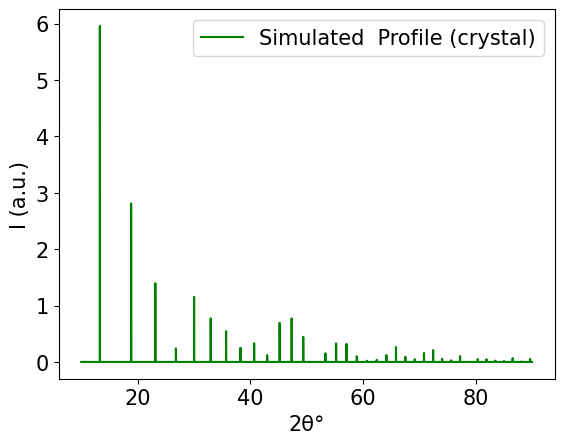

XRD simulation process of WPEM is completed !


[2360.523508370796,
 4545.021660543817,
 862.3129315367245,
 405.56674095694046,
 1235.2632508897448,
 3042.7373521844797,
 424.7910750398289,
 1830.5484955182544,
 1382.3495252019673,
 287.57944114184386,
 1828.294769169163,
 2256.931416848341,
 1430.5858093055522,
 294.63041673983145,
 2729.8696363869453,
 1430.5946452455146,
 1940.2462189326907,
 111.42937966312714,
 198.9942771219811,
 351.59615776617625,
 1622.954482742926,
 292.92097785828196,
 988.2024966204501,
 1128.8278044817291,
 1570.7750644664497,
 212.64534176394343,
 121.27776721588188,
 878.679655839384,
 232.89096256336222,
 1763.5072610761858,
 207.83985134690332,
 146.1492626260586,
 331.1352060813925,
 141.26851975524178,
 538.9708708483438]

<Figure size 640x480 with 0 Axes>

In [8]:
WPEM.XRDSimulation(filepath='Mn2O3.cif')

the space group of input crystal is : I 2b 2c 3
cif file parse completed
retrieval of all reciprocal vectors satisfying the diffraction geometry is done
extinction peaks are distinguished
There are 27 extinction peaks
Diffraction condition judgment end !


Initilized with peak's shape


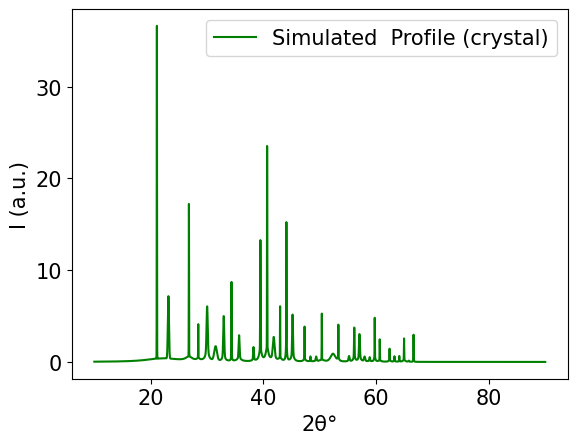

XRD simulation process of WPEM is completed !


[2074.7344790432476,
 4151.582216015114,
 782.5128769602214,
 391.51899836099994,
 1235.6390492950886,
 3143.6993611088456,
 452.1997622299704,
 1951.1283411428926,
 1524.7339359033508,
 316.4940595889515,
 2060.590575959734,
 2590.0879642238647,
 1692.2677406257524,
 367.13843751510734,
 3580.1164476511053,
 1882.22974865124,
 2446.4884952527186,
 131.59438861697126,
 251.67681183902735,
 487.841560236581,
 2027.2462518099735,
 386.20230242239325,
 1174.8798832666675,
 1453.8138489674927,
 1996.1562673217302,
 271.54427539959875,
 146.0026422421058,
 1163.1388246519405,
 332.2824825579718,
 2415.174512926339,
 291.9215965286446,
 194.0069276807772,
 466.69573158056727,
 189.07522909535163,
 692.8099913780713]

<Figure size 640x480 with 0 Axes>

In [9]:
WPEM.XRDSimulation(filepath='Mn2O3.cif',PeakWidth=True,CSWPEMout='WPEMpeak.csv')